In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 'pyr_four_nostr.csv' is the original classifier train set
# 'pyr_four_nostr_mmstats.csv' adds in 10 additional mito-to-mito distance statistics

pyr_four = pd.read_csv('pyr_four_nostr.csv', index_col=[0])

In [5]:
# split test size
testsize = 0.30

# number of estimators
n_est = 1000

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

In [6]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [8]:
predictions = dtree.predict(X_test)

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.78      0.78      0.78      5980
      Axonal       0.72      0.74      0.73      3712
       Basal       0.84      0.84      0.84     16400
     Somatic       0.96      0.96      0.96     28180

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [10]:
print(confusion_matrix(y_test,predictions))

[[ 4680    95   990   215]
 [   73  2759   762   118]
 [ 1036   832 13723   809]
 [  239   128   837 26976]]


In [11]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [12]:
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 483.312 seconds


In [13]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 4744    22  1031   183]
 [   44  2921   621   126]
 [  582   384 14770   664]
 [   48    14   307 27811]]


In [14]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.88      0.79      0.83      5980
      Axonal       0.87      0.79      0.83      3712
       Basal       0.88      0.90      0.89     16400
     Somatic       0.97      0.99      0.98     28180

    accuracy                           0.93     54272
   macro avg       0.90      0.87      0.88     54272
weighted avg       0.92      0.93      0.92     54272



In [15]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [16]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [17]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 46.194 seconds


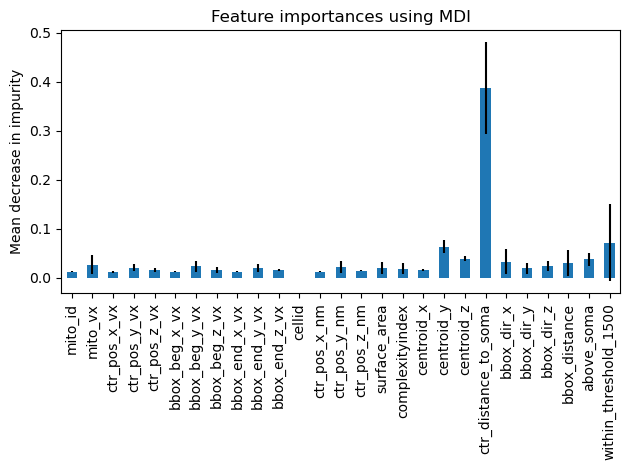

In [18]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
# re-run without updating rfc
# these 3 lines are required for the increased accuracy; if you uncomment them, the following analysis is not different from above
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [21]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.79      0.79      0.79      6025
      Axonal       0.72      0.74      0.73      3737
       Basal       0.84      0.84      0.84     16416
     Somatic       0.96      0.96      0.96     28094

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [22]:
print(confusion_matrix(y_test,predictions))

[[ 4749    73   993   210]
 [   67  2772   768   130]
 [  911   881 13809   815]
 [  251   133   829 26881]]


In [23]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 5647     4   316    58]
 [   17  3486   188    46]
 [  169   104 15957   186]
 [   17     4   113 27960]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.97      0.94      0.95      6025
      Axonal       0.97      0.93      0.95      3737
       Basal       0.96      0.97      0.97     16416
     Somatic       0.99      1.00      0.99     28094

    accuracy                           0.98     54272
   macro avg       0.97      0.96      0.97     54272
weighted avg       0.98      0.98      0.98     54272



In [25]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [26]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [27]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 43.935 seconds


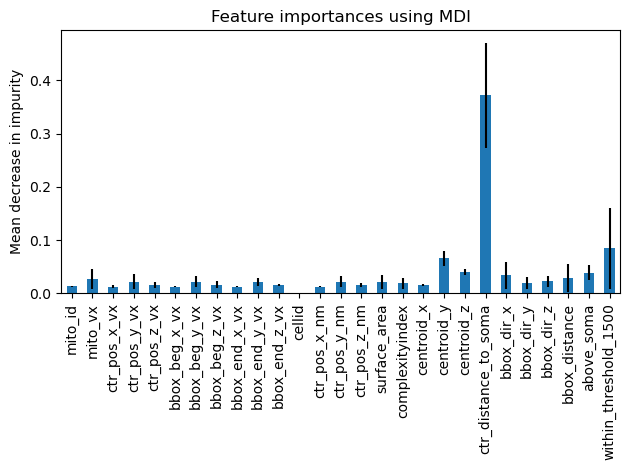

In [28]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()